In [1]:
import os.path

import np as np
import pandas as pd

Data_set_path = "data_set"


def load_train_data_set(data_set_path=Data_set_path):
    csv_path = os.path.join(data_set_path, "train_full_Real-estate.csv")
    return pd.read_csv(csv_path)


def load_test_data_set(data_set_path=Data_set_path):
    csv_path = os.path.join(data_set_path, "test_full_Real-estate.csv")
    return pd.read_csv(csv_path)


C:\Users\小 周\AppData\Local\Temp\ipykernel_9648\583530823.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_data = load_train_data_set()
train_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,292,2012.833,3.4,56.47425,7,24.95744,121.53711,54.4
1,239,2013.083,12.8,732.85280,0,24.97668,121.52518,40.6
2,362,2013.083,41.4,281.20500,8,24.97345,121.54093,63.3
3,219,2013.417,13.6,492.23130,5,24.96515,121.53737,43.8
4,237,2013.167,3.6,373.83890,10,24.98322,121.53765,61.9


In [3]:
test_data = load_test_data_set()
test_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,249,2013.000,19.0,1009.23500,0,24.96357,121.54951,22.3
1,253,2012.833,5.9,90.45606,9,24.97433,121.54310,52.7
2,324,2013.417,28.6,197.13380,6,24.97631,121.54436,42.5
3,121,2013.167,13.3,492.23130,5,24.96515,121.53737,31.3
4,135,2012.667,33.4,186.96860,6,24.96604,121.54211,42.2


In [4]:
corr_matrix = train_data.corr()
corr_matrix["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.573706
X5 latitude                               0.558391
X6 longitude                              0.508148
X1 transaction date                       0.081665
No                                       -0.029909
X2 house age                             -0.232000
X3 distance to the nearest MRT station   -0.672924
Name: Y house price of unit area, dtype: float64

In [5]:
train_features = train_data.drop(
    columns=["No", "X1 transaction date", "Y house price of unit area"])

train_price = train_data["Y house price of unit area"]
train_price = train_price.where(
    train_price < 61.5, 61.5)

test_features = test_data.drop(
    columns=["No", "X1 transaction date", "Y house price of unit area"])
test_price = test_data["Y house price of unit area"]

<Axes: >

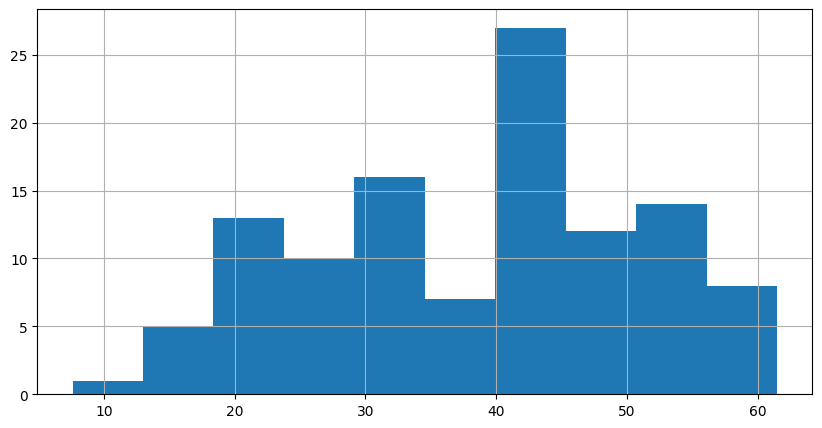

In [6]:
test_price.hist(bins=10, figsize=(10, 5))

<Axes: >

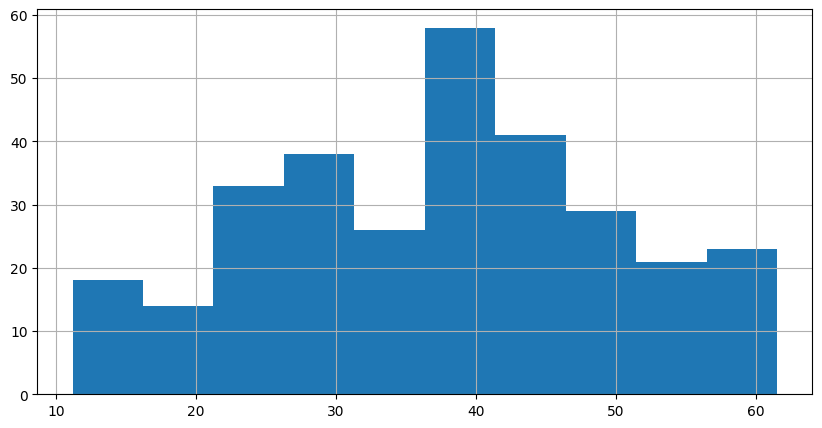

In [7]:
train_price.hist(bins=10, figsize=(10, 5))

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

line_regressor = LinearRegression()
line_regressor.fit(train_features, train_price)
line_predictions = line_regressor.predict(test_features)
line_rmse = np.sqrt(mean_squared_error(test_price, line_predictions))
print(f"line_RMSE: {line_rmse}")
max_value_test = max(test_price)
min_value_test = min(test_price)
max_value_train = max(train_price)
min_value_train = min(train_price)
print("test min~max:", min_value_test, "~", max_value_test)
print("train min~max:", min_value_train, "~", max_value_train)
line_scores = cross_val_score(line_regressor, train_features, train_price, scoring="neg_mean_squared_error", cv=5)
line_rmse_scores = np.sqrt(-line_scores)

line_RMSE: 8.577907637632277
test min~max: 7.6 ~ 61.5
train min~max: 11.2 ~ 61.5


In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(train_features, train_price)
tree_predictions = tree_regressor.predict(test_features)
tree_rmse = np.sqrt(mean_squared_error(test_price, tree_predictions))
print(f"tree_RMSE:{tree_rmse}")
tree_scores = cross_val_score(tree_regressor, train_features, train_price, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)


tree_RMSE:8.347944013215926


In [10]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(random_state=10)
forest_regressor.fit(train_features, train_price)

forest_predictions = forest_regressor.predict(test_features)
forest_rmse = np.sqrt(mean_squared_error(test_price, forest_predictions))
print(f"forest_RMSE:{forest_rmse}")
forest_scores = cross_val_score(forest_regressor, train_features, train_price, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

forest_RMSE:7.084660835461315


In [11]:
def display_scores(scores):
    print("scores", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [12]:
display_scores(tree_rmse_scores)

scores [6.68078969 6.24473111 6.64409512 5.98876726 8.50056371]
mean: 6.811789378111419
standard deviation: 0.8827413544462129


In [13]:
display_scores(line_rmse_scores)

scores [8.10782741 6.91174891 6.77448667 6.27166466 8.16815158]
mean: 7.246775844653742
standard deviation: 0.7584833513782522


In [14]:
display_scores(forest_rmse_scores)

scores [6.55992951 4.55949237 5.77108337 4.91855095 6.54087813]
mean: 5.669986863131959
standard deviation: 0.8195759838376149


In [15]:
train_price_label = train_price
test_price_label = test_price
train_price_label_T = train_price
test_price_label_T = test_price
train_price_label = np.where(train_price_label >= 30, "expensive", "not_expensive")
test_price_label = np.where(test_price_label >= 30, "expensive", "not_expensive")


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Classifier = RandomForestClassifier(random_state=10)
Classifier.fit(train_features, train_price_label)
preictions = Classifier.predict(test_features)
accuracy = accuracy_score(test_price_label, preictions)
print(f"分类模型的准确度: {accuracy}")
print(preictions[:10])
print(test_price_label[:10])
cross_val_score(Classifier, train_features, train_price_label, cv=10, scoring="accuracy")

分类模型的准确度: 0.8849557522123894
['not_expensive' 'expensive' 'expensive' 'expensive' 'expensive'
 'expensive' 'not_expensive' 'expensive' 'not_expensive' 'not_expensive']
['not_expensive' 'expensive' 'expensive' 'expensive' 'expensive'
 'expensive' 'not_expensive' 'expensive' 'not_expensive' 'expensive']


array([0.93548387, 0.93333333, 0.9       , 0.93333333, 0.86666667,
       0.9       , 0.86666667, 0.9       , 0.93333333, 0.93333333])

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=10)
sgd_classifier.fit(train_features, train_price_label)
sgd_predictions = sgd_classifier.predict(test_features)
sgd_accuracy = accuracy_score(test_price_label, sgd_predictions)
print(f"分类模型的准确度: {sgd_accuracy}")
cross_val_score(sgd_classifier, train_features, train_price_label, cv=10, scoring="accuracy")

分类模型的准确度: 0.8672566371681416


array([0.90322581, 0.96666667, 0.86666667, 0.8       , 0.76666667,
       0.9       , 0.8       , 0.76666667, 0.8       , 0.8       ])

In [18]:
from sklearn.base import BaseEstimator


class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass

    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)


base_foress = Never5Classifier()

base_foress.fit(train_features, train_price_label)
base_predictions = base_foress.predict(test_features)
base_accuracy = accuracy_score(test_price_label, base_predictions)
print(f"分类模型的准确度: {base_accuracy}")
print(base_predictions[:10])
print(test_price_label[:10])
cross_val_score(base_foress, train_features, train_price_label, cv=10, scoring="accuracy")

分类模型的准确度: 0.0
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]
['not_expensive' 'expensive' 'expensive' 'expensive' 'expensive'
 'expensive' 'not_expensive' 'expensive' 'not_expensive' 'expensive']


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])